<a href="https://colab.research.google.com/github/kjnikhil6/Logicmojo-AI-ML-Sept25-kjnikhil6/blob/main/Assignment_4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [135]:
import warnings

warnings.filterwarnings('ignore')

In [136]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Read the csv file using 'read_csv'. Please write your dataset location here.

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Logicmojo_DataSciece/Assignment-4-Logistic-Regression/leads.csv')

In [5]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
df.shape

(9240, 37)

In [9]:
#checking for null values
dfSummary = pd.DataFrame({
    'dtype': df.dtypes,
    'missing_count': df.isnull().sum(),
    'missing_%': 100 * df.isnull().sum() / len(df)
}).sort_values('missing_%', ascending=False)
print(dfSummary)

                                                 dtype  missing_count  \
Lead Quality                                    object           4767   
Asymmetrique Profile Index                      object           4218   
Asymmetrique Activity Score                    float64           4218   
Asymmetrique Activity Index                     object           4218   
Asymmetrique Profile Score                     float64           4218   
Tags                                            object           3353   
What matters most to you in choosing a course   object           2709   
Lead Profile                                    object           2709   
What is your current occupation                 object           2690   
Country                                         object           2461   
How did you hear about X Education              object           2207   
Specialization                                  object           1438   
City                                            obj

In [10]:
# List of columns to drop
cols_to_drop = [
    'Asymmetrique Profile Index',
    'Asymmetrique Activity Score',
    'Asymmetrique Activity Index',
    'Asymmetrique Profile Score',
    'Lead Quality',
    'Tags',
    'Lead Profile'
]

# Drop the columns
# axis=1 indicates columns, inplace=True modifies the dataframe directly
df.drop(cols_to_drop, axis=1, inplace=True)

# Verify the drop
print("Columns dropped successfully.")
print(f"New Dataframe Shape: {df.shape}")

# Optional: Check remaining missing values percentage to confirm progress
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False).head(10)

Columns dropped successfully.
New Dataframe Shape: (9240, 30)


,0
What matters most to you in choosing a course,29.32
What is your current occupation,29.11
Country,26.63
How did you hear about X Education,23.89
Specialization,15.56
City,15.37
Page Views Per Visit,1.48
TotalVisits,1.48
Last Activity,1.11
Lead Source,0.39


In [11]:
df['What matters most to you in choosing a course'].unique()

array(['Better Career Prospects', nan, 'Flexibility & Convenience',
       'Other'], dtype=object)

In [12]:
# Check the distribution of values
df['What matters most to you in choosing a course'].value_counts(normalize=True)

,proportion
What matters most to you in choosing a course,
Better Career Prospects,0.999541
Flexibility & Convenience,0.000306
Other,0.000153


In [13]:
#99% is Better Career Prospects we will drop it
df.drop(['What matters most to you in choosing a course'],axis=1, inplace=True)

In [14]:
df['Country'].value_counts(normalize=True)

,proportion
Country,
India,0.957663
United States,0.010178
United Arab Emirates,0.007818
Singapore,0.003540
Saudi Arabia,0.003098
United Kingdom,0.002213
Australia,0.001918
Qatar,0.001475
Hong Kong,0.001033


In [15]:
#lets drop country since 95% are from india . and imputing with  mode will only increase it
df.drop(['Country'],axis=1, inplace=True)

In [16]:
df['What is your current occupation'].unique()

array(['Unemployed', 'Student', nan, 'Working Professional',
       'Businessman', 'Other', 'Housewife'], dtype=object)

In [17]:
df['What is your current occupation'].value_counts(normalize=True)

,proportion
What is your current occupation,
Unemployed,0.854962
Working Professional,0.107786
Student,0.032061
Other,0.002443
Housewife,0.001527
Businessman,0.001221


In [18]:
# 1. Fill missing values (NaNs) with 'Other'
df['What is your current occupation'].fillna('Other', inplace=True)

# 2. Group small categories (Housewife, Businessman) into 'Other'
# We keep 'Unemployed', 'Working Professional', and 'Student'. Everything else becomes 'Other'.
rare_categories = ['Housewife', 'Businessman']
df['What is your current occupation'] = df['What is your current occupation'].replace(rare_categories, 'Other')

# Verify the new distribution
print(df['What is your current occupation'].value_counts(normalize=True))

What is your current occupation
Unemployed              0.606061
Other                   0.294805
Working Professional    0.076407
Student                 0.022727
Name: proportion, dtype: float64


In [19]:
df.rename(columns={'What is your current occupation': 'Occupation'}, inplace=True)

In [20]:
df['Specialization'].value_counts(normalize=True)

,proportion
Specialization,
Select,0.248911
Finance Management,0.125096
Human Resource Management,0.108690
Marketing Management,0.107408
Operations Management,0.064471
Business Administration,0.051653
IT Projects Management,0.046911
Supply Chain Management,0.044732
"Banking, Investment And Insurance",0.043322


In [21]:
# 1. Fill actual NaNs with 'Other_Specialization'
df['Specialization'] = df['Specialization'].fillna('Other_Specialization')

# 2. Replace 'Select' values with 'Other_Specialization'
df['Specialization'] = df['Specialization'].replace('Select', 'Other_Specialization')

# Verify: You should see 'Other_Specialization' as the dominant category now (~40%)
print(df['Specialization'].value_counts(normalize=True))

Specialization
Other_Specialization                 0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Media and Advertising                0.021970
Travel and Tourism                   0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: proportion, dtype: float64


In [22]:
df['City'].value_counts(normalize=True)

,proportion
City,
Mumbai,0.412020
Select,0.287596
Thane & Outskirts,0.096164
Other Cities,0.087724
Other Cities of Maharashtra,0.058440
Other Metro Cities,0.048593
Tier II Cities,0.009463


In [23]:
# 1. Handle Missing Values (NaN) & 'Select'
df['City'] = df['City'].replace('Select', 'Unknown')
df['City'] = df['City'].fillna('Unknown')

# Verify the new distribution
print(df['City'].value_counts(normalize=True))

City
Unknown                        0.397078
Mumbai                         0.348701
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: proportion, dtype: float64


In [24]:
df['Page Views Per Visit'].fillna(df['Page Views Per Visit'].median(), inplace=True)
df['TotalVisits'].fillna(df['TotalVisits'].median(), inplace=True)


In [25]:
df['Last Activity'].value_counts(normalize=True)

,proportion
Last Activity,
Email Opened,0.376163
SMS Sent,0.300427
Olark Chat Conversation,0.106490
Page Visited on Website,0.070045
Converted to Lead,0.046843
Email Bounced,0.035679
Email Link Clicked,0.029222
Form Submitted on Website,0.012696
Unreachable,0.010178


In [26]:
df['Lead Source'].value_counts(normalize=True)

,proportion
Lead Source,
Google,0.311604
Direct Traffic,0.276293
Olark Chat,0.190678
Organic Search,0.125380
Reference,0.058018
Welingak Website,0.015428
Referral Sites,0.013581
Facebook,0.005976
bing,0.000652


In [27]:
df['Last Activity'].fillna(df['Last Activity'].mode()[0], inplace=True)
df['Lead Source'].fillna(df['Lead Source'].mode()[0], inplace=True)

In [28]:
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False).head(10)

,0
How did you hear about X Education,23.89
Prospect ID,0.00
Lead Origin,0.00
Lead Number,0.00
Do Not Email,0.00
Do Not Call,0.00
Converted,0.00
TotalVisits,0.00
Total Time Spent on Website,0.00
Page Views Per Visit,0.00


In [29]:
df['How did you hear about X Education'].value_counts(normalize=True)

,proportion
How did you hear about X Education,
Select,0.717048
Online Search,0.114887
Word Of Mouth,0.049481
Student of SomeSchool,0.044078
Other,0.026447
Multiple Sources,0.021612
Advertisements,0.009953
Social Media,0.009527
Email,0.003697


In [30]:
# Reason: >95% of the data is either 'Select' or NaN (No variance)
df.drop('How did you hear about X Education', axis=1, inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Prospect ID                               9240 non-null   object 
 1   Lead Number                               9240 non-null   int64  
 2   Lead Origin                               9240 non-null   object 
 3   Lead Source                               9240 non-null   object 
 4   Do Not Email                              9240 non-null   object 
 5   Do Not Call                               9240 non-null   object 
 6   Converted                                 9240 non-null   int64  
 7   TotalVisits                               9240 non-null   float64
 8   Total Time Spent on Website               9240 non-null   int64  
 9   Page Views Per Visit                      9240 non-null   float64
 10  Last Activity                       

###**Bivariant** **Analysis**

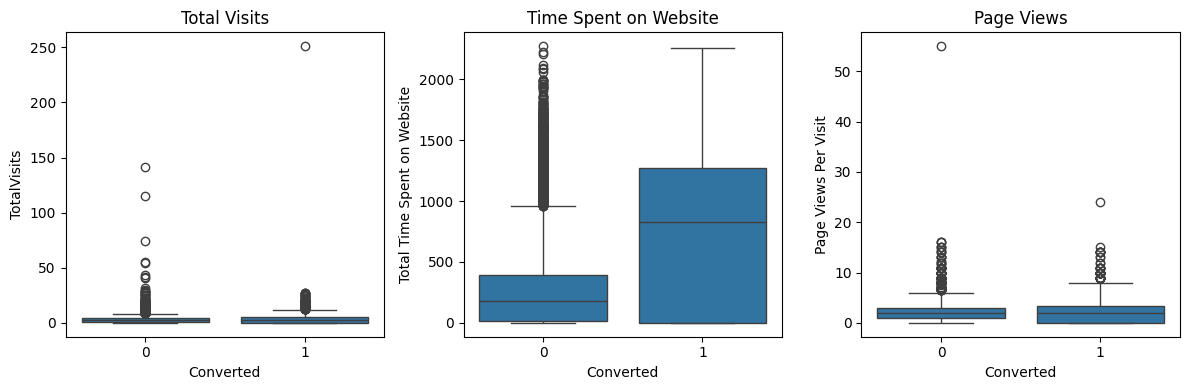

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size
plt.figure(figsize=(12, 4))

# 1. Total Visits
plt.subplot(1, 3, 1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.title('Total Visits')

# 2. Total Time Spent
plt.subplot(1, 3, 2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.title('Time Spent on Website')

# 3. Page Views Per Visit
plt.subplot(1, 3, 3)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.title('Page Views')

plt.tight_layout()
plt.show()

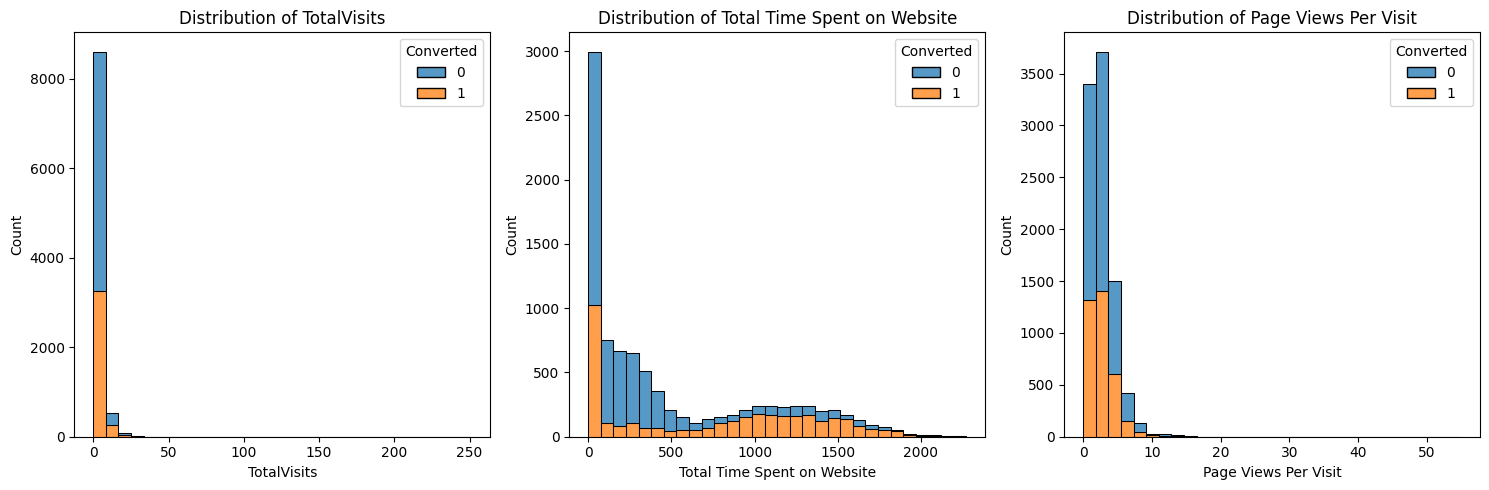

In [33]:
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    # kde=True adds the smooth curve, bins=20 groups the data
    sns.histplot(data=df, x=col, hue='Converted', multiple='stack', bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

These charts are the "smoking gun." They confirm exactly what we suspected about the data quality and which variables will drive your model.

Here is my analysis of the images you uploaded:

1. The "Golden Feature": Time Spent on Website
Verdict: Strongest Predictor.

Box Plot (Middle): Look at the massive separation between the two boxes.

Not Converted (0): The median (the line inside the box) is very low, near 0.

Converted (1): The median jumps up to around 1000 seconds.

Histogram (Middle): As you move to the right (higher time), the orange bars (Converted) start to dominate the blue bars.

Insight: If a user spends more than ~400 seconds on the site, their probability of converting skyrockets. This will be the heavy lifter in your model.

2. The "Outlier Problem": TotalVisits & Page Views
Verdict: Needs Capping (Cleaning required).

Box Plots (Left & Right): The boxes are completely squashed at the bottom because of the "dots" (outliers) floating high above.

TotalVisits: Most people visit 0-10 times, but you have single users at 250.

Page Views: Most view 0-5 pages, but outliers go up to 55.

Histogram (Left & Right): The graphs look "broken." Because the X-axis has to stretch to 250 to fit that one outlier, all the real data gets crushed into a single bar on the left. This "squashing" effect confuses machine learning algorithms (especially Logistic Regression).

In [34]:
# 1. Cap TotalVisits at 99th Percentile
q1_visits = df['TotalVisits'].quantile(0.99)
df['TotalVisits'][df['TotalVisits'] >= q1_visits] = q1_visits

# 2. Cap Page Views Per Visit at 99th Percentile
q1_pv = df['Page Views Per Visit'].quantile(0.99)
df['Page Views Per Visit'][df['Page Views Per Visit'] >= q1_pv] = q1_pv

# Verification: Check the max values again to confirm they dropped
print("Max TotalVisits:", df['TotalVisits'].max())
print("Max Page Views:", df['Page Views Per Visit'].max())

Max TotalVisits: 17.0
Max Page Views: 9.0


In [35]:
# 1. Check "Yes/No" Binary Columns for Skew
binary_cols = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article',
               'X Education Forums', 'Newspaper', 'Digital Advertisement',
               'Through Recommendations', 'Receive More Updates About Our Courses',
               'Update me on Supply Chain Content', 'Get updates on DM Content',
               'I agree to pay the amount through cheque',
               'A free copy of Mastering The Interview']

# We print the value counts for each.
# If one value is > 99%, we should drop the column.
for col in binary_cols:
    print(f"--- {col} ---")
    print(df[col].value_counts(normalize=True))
    print("\n")

--- Do Not Email ---
Do Not Email
No     0.920563
Yes    0.079437
Name: proportion, dtype: float64


--- Do Not Call ---
Do Not Call
No     0.999784
Yes    0.000216
Name: proportion, dtype: float64


--- Search ---
Search
No     0.998485
Yes    0.001515
Name: proportion, dtype: float64


--- Magazine ---
Magazine
No    1.0
Name: proportion, dtype: float64


--- Newspaper Article ---
Newspaper Article
No     0.999784
Yes    0.000216
Name: proportion, dtype: float64


--- X Education Forums ---
X Education Forums
No     0.999892
Yes    0.000108
Name: proportion, dtype: float64


--- Newspaper ---
Newspaper
No     0.999892
Yes    0.000108
Name: proportion, dtype: float64


--- Digital Advertisement ---
Digital Advertisement
No     0.999567
Yes    0.000433
Name: proportion, dtype: float64


--- Through Recommendations ---
Through Recommendations
No     0.999242
Yes    0.000758
Name: proportion, dtype: float64


--- Receive More Updates About Our Courses ---
Receive More Updates About Our C

In [36]:
# List of columns where >99% of the data is the same
cols_to_drop = [
    'Do Not Call',
    'Search',
    'Magazine',
    'Newspaper Article',
    'X Education Forums',
    'Newspaper',
    'Digital Advertisement',
    'Through Recommendations',
    'Receive More Updates About Our Courses',
    'Update me on Supply Chain Content',
    'Get updates on DM Content',
    'I agree to pay the amount through cheque'
]

# Drop them
df.drop(cols_to_drop, axis=1, inplace=True)

print(f"Dropped {len(cols_to_drop)} low-variance columns.")
print(f"Remaining Columns: {df.shape[1]}")

Dropped 12 low-variance columns.
Remaining Columns: 15


In [37]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

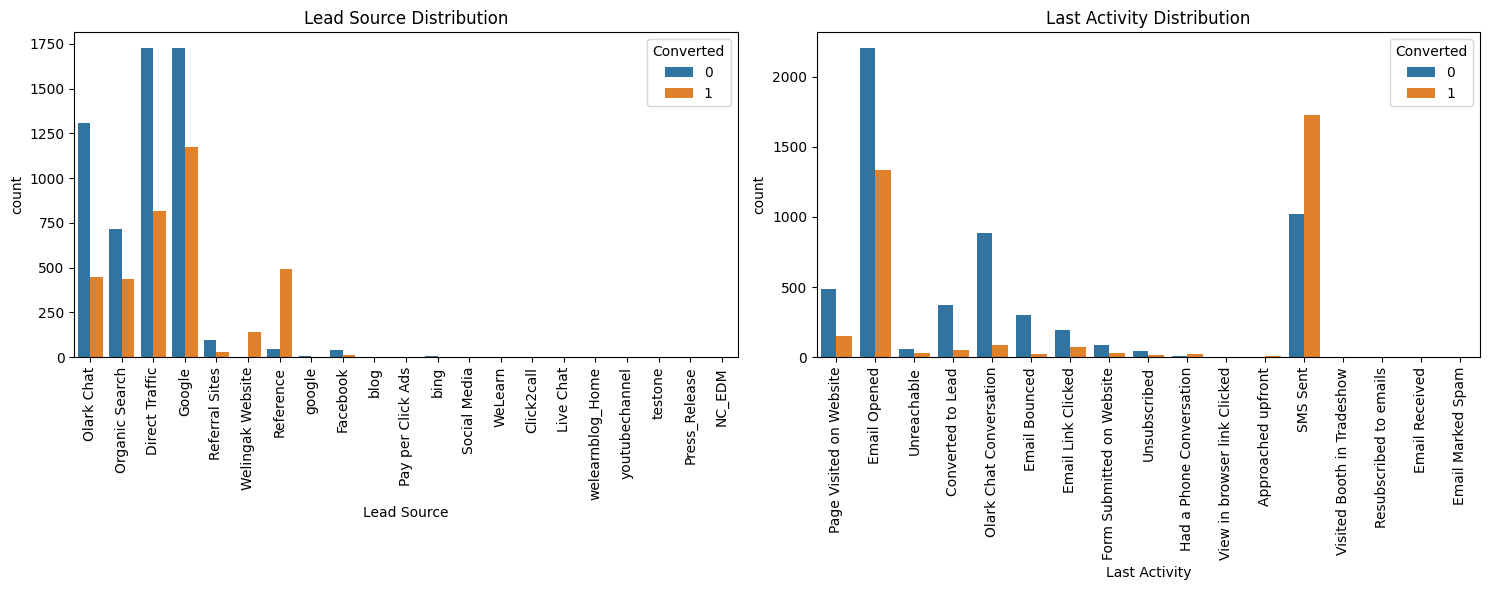

--- Lead Source Counts (%) ---
Lead Source
Google               31.43
Direct Traffic       27.52
Olark Chat           18.99
Organic Search       12.49
Reference             5.78
Welingak Website      1.54
Referral Sites        1.35
Facebook              0.60
bing                  0.06
google                0.05
Click2call            0.04
Live Chat             0.02
Social Media          0.02
Press_Release         0.02
Pay per Click Ads     0.01
blog                  0.01
WeLearn               0.01
welearnblog_Home      0.01
youtubechannel        0.01
testone               0.01
NC_EDM                0.01
Name: proportion, dtype: float64

--- Last Activity Counts (%) ---
Last Activity
Email Opened                    38.31
SMS Sent                        29.71
Olark Chat Conversation         10.53
Page Visited on Website          6.93
Converted to Lead                4.63
Email Bounced                    3.53
Email Link Clicked               2.89
Form Submitted on Website        1.26
Unrea

In [38]:

# Set up the figure area
plt.figure(figsize=(15, 6))

# 1. Lead Source Plot
plt.subplot(1, 2, 1)
sns.countplot(x='Lead Source', hue='Converted', data=df)
plt.title('Lead Source Distribution')
plt.xticks(rotation=90) # Rotate text to prevent overlapping

# 2. Last Activity Plot
plt.subplot(1, 2, 2)
sns.countplot(x='Last Activity', hue='Converted', data=df)
plt.title('Last Activity Distribution')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# --- PRINT THE EXACT COUNTS (To find the <1% categories) ---
print("--- Lead Source Counts (%) ---")
print(df['Lead Source'].value_counts(normalize=True).mul(100).round(2))
print("\n--- Last Activity Counts (%) ---")
print(df['Last Activity'].value_counts(normalize=True).mul(100).round(2))

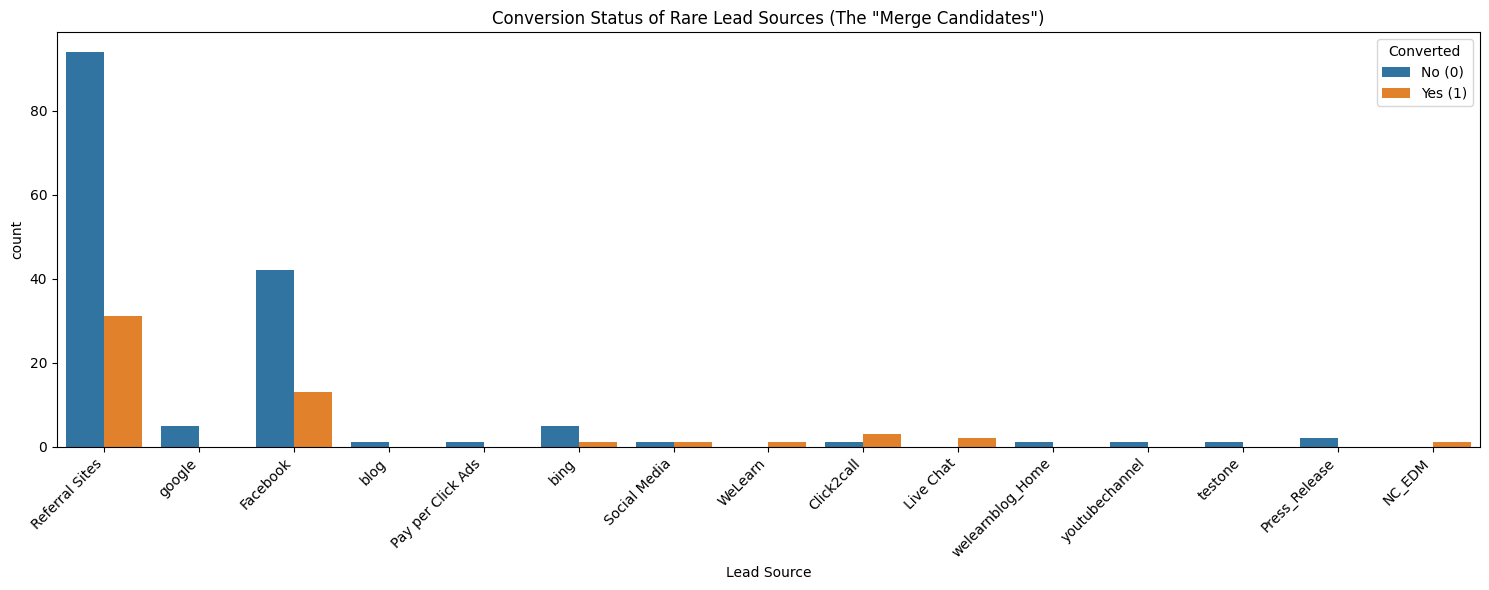

Converted                 0         1
Lead Source                          
Click2call         0.250000  0.750000
Facebook           0.763636  0.236364
Live Chat               NaN  1.000000
NC_EDM                  NaN  1.000000
Pay per Click Ads  1.000000       NaN
Press_Release      1.000000       NaN
Referral Sites     0.752000  0.248000
Social Media       0.500000  0.500000
WeLearn                 NaN  1.000000
bing               0.833333  0.166667
blog               1.000000       NaN
google             1.000000       NaN
testone            1.000000       NaN
welearnblog_Home   1.000000       NaN
youtubechannel     1.000000       NaN


In [39]:

# 1. Define the "Major" sources we are keeping
major_sources = ['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference', 'Welingak Website']

# 2. Create a temporary dataframe of ONLY the "Minor" sources (the ones we plan to merge)
# We use the tilde (~) to say "NOT in major_sources"
minor_sources_df = df[~df['Lead Source'].isin(major_sources)]

# 3. Plot them
plt.figure(figsize=(15, 6))
sns.countplot(x='Lead Source', hue='Converted', data=minor_sources_df)
plt.title('Conversion Status of Rare Lead Sources (The "Merge Candidates")')
plt.xticks(rotation=45, ha='right') # Angle the text so it's readable
plt.legend(title='Converted', loc='upper right', labels=['No (0)', 'Yes (1)'])
plt.tight_layout()
plt.show()

# 4. Print the raw numbers to be sure
print(minor_sources_df.groupby('Lead Source')['Converted'].value_counts(normalize=True).unstack())

In [40]:
# We handle the 'google' typo first to ensure it's not counted as minor
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

In [41]:
# 1. Get percentage distribution
lead_source_pct = df['Lead Source'].value_counts(normalize=True) * 100
activity_stats = df['Last Activity'].value_counts(normalize=True) * 100

# 2. Identify rare categories (<5%)
rare_sources = lead_source_pct[lead_source_pct < 5].index
rare_activities = activity_stats[activity_stats < 5].index

# 3. Filter rows belonging to rare categories
minor_sources_df = df[df['Lead Source'].isin(rare_sources)]
minor_activities_df = df[df['Last Activity'].isin(rare_activities)]


--- Conversion Rates: Minor Lead Sources ---
                     mean  count
Lead Source                     
Live Chat          100.00      2
NC_EDM             100.00      1
WeLearn            100.00      1
Welingak Website    98.59    142
Click2call          75.00      4
Social Media        50.00      2
Referral Sites      24.80    125
Facebook            23.64     55
bing                16.67      6
Press_Release        0.00      2
Pay per Click Ads    0.00      1
blog                 0.00      1
testone              0.00      1
welearnblog_Home     0.00      1
youtubechannel       0.00      1

--- Conversion Rates: Minor Last Activities ---
                                mean  count
Last Activity                              
Approached upfront            100.00      9
Email Marked Spam             100.00      2
Email Received                100.00      2
Resubscribed to emails        100.00      1
Had a Phone Conversation       73.33     30
Unreachable                    33.33 

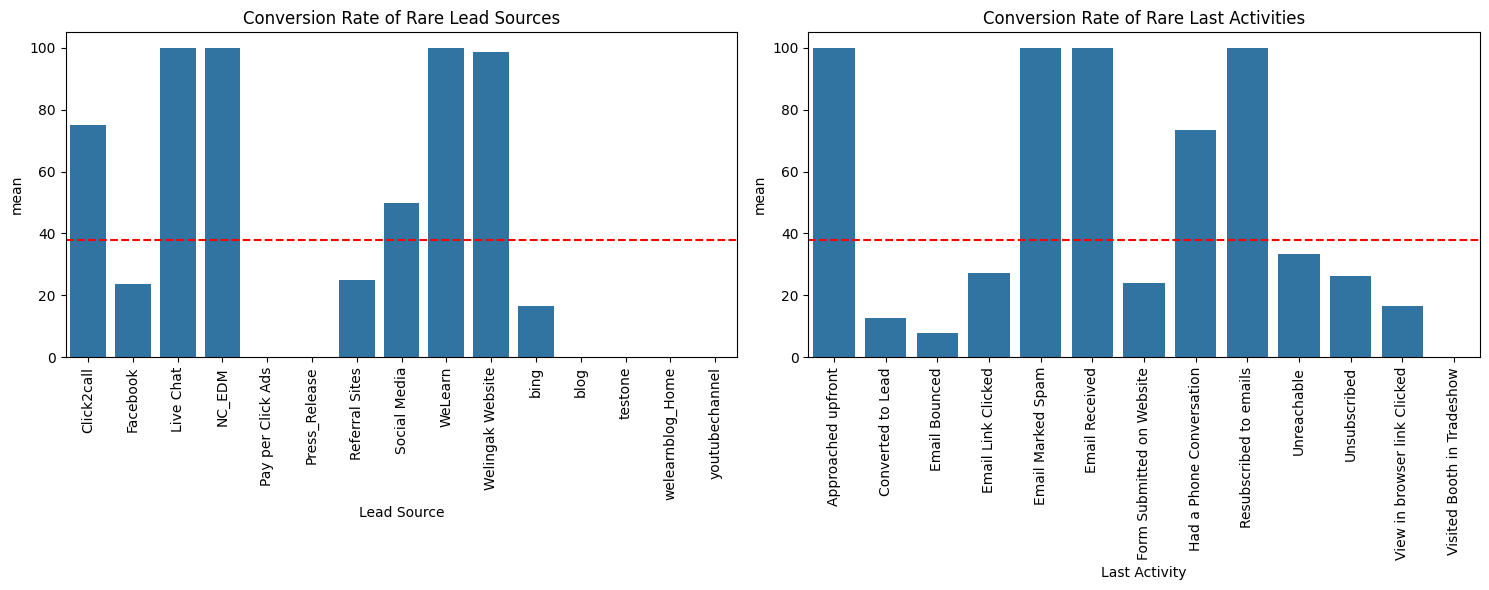

In [42]:


# 1. Calculate Conversion Rates
print("--- Conversion Rates: Minor Lead Sources ---")
source_stats = minor_sources_df.groupby('Lead Source')['Converted'].agg(['mean', 'count'])
source_stats['mean'] = (source_stats['mean'] * 100).round(2)
print(source_stats.sort_values(by='mean', ascending=False))

print("\n--- Conversion Rates: Minor Last Activities ---")
activity_stats = minor_activities_df.groupby('Last Activity')['Converted'].agg(['mean', 'count'])
activity_stats['mean'] = (activity_stats['mean'] * 100).round(2)
print(activity_stats.sort_values(by='mean', ascending=False))

# 4. Plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=source_stats.index, y=source_stats['mean'])
plt.title('Conversion Rate of Rare Lead Sources')
plt.axhline(38, color='r', linestyle='--', label='Avg (38%)') # Average Conversion Line
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.barplot(x=activity_stats.index, y=activity_stats['mean'])
plt.title('Conversion Rate of Rare Last Activities')
plt.axhline(38, color='r', linestyle='--', label='Avg (38%)')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Lead Sources<br>
Welingak Website a total of 142 with conversionr rate of   98.59  . keep as seperate


Last Activity<br>
Converted to Lead (428), Email Bounced (326), and Email Link Clicked (267) are significantly larger than the rest.




In [43]:
# --- 1. CLEAN LEAD SOURCE ---
# We keep Welingak Website because it's a "High Value" feature (98% conversion)
source_whitelist = [
    'Google',
    'Direct Traffic',
    'Olark Chat',
    'Organic Search',
    'Reference',
    'Welingak Website'
]

# Apply Grouping
df['Lead Source'] = df['Lead Source'].apply(lambda x: x if x in source_whitelist else 'Other_Source')

# --- 2. CLEAN LAST ACTIVITY ---
# We add 'Converted to Lead', 'Email Bounced', 'Email Link Clicked' to the keep list
# because your data showed they have significant volume (>250 rows).
activity_whitelist = [
    'Email Opened',
    'SMS Sent',
    'Olark Chat Conversation',
    'Page Visited on Website',
    'Converted to Lead',
    'Email Bounced',
    'Email Link Clicked'
]

# Apply Grouping
df['Last Activity'] = df['Last Activity'].apply(lambda x: x if x in activity_whitelist else 'Other_Activity')

# --- FINAL CHECK ---
print("Final Lead Source Categories:", len(df['Lead Source'].unique()))
print("Final Last Activity Categories:", len(df['Last Activity'].unique()))

Final Lead Source Categories: 7
Final Last Activity Categories: 8


In [44]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'Occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [45]:
df["Last Notable Activity"].value_counts(normalize=True)

,proportion
Last Notable Activity,
Modified,0.368723
Email Opened,0.305952
SMS Sent,0.235065
Page Visited on Website,0.034416
Olark Chat Conversation,0.019805
Email Link Clicked,0.018723
Email Bounced,0.006494
Unsubscribed,0.005087
Unreachable,0.003463


In [46]:
#Calculate Conversion Rates
print("--- Conversion Rates: ---")
source_stats = df.groupby('Last Notable Activity')['Converted'].agg(['mean', 'count'])
source_stats['mean'] = (source_stats['mean'] * 100).round(2)
print(source_stats.sort_values(by='mean', ascending=False))


--- Conversion Rates: ---
                                mean  count
Last Notable Activity                      
Approached upfront            100.00      1
Email Marked Spam             100.00      2
Email Received                100.00      1
Resubscribed to emails        100.00      1
Had a Phone Conversation       92.86     14
SMS Sent                       69.43   2172
Unreachable                    68.75     32
Email Opened                   36.93   2827
Unsubscribed                   29.79     47
Page Visited on Website        29.25    318
Email Link Clicked             26.01    173
Modified                       22.98   3407
Email Bounced                  15.00     60
Olark Chat Conversation        13.66    183
Form Submitted on Website       0.00      1
View in browser link Clicked    0.00      1


In [47]:
# Define the Top 6 categories to keep
notable_whitelist = [
    'Modified',
    'Email Opened',
    'SMS Sent',
    'Page Visited on Website',
    'Olark Chat Conversation',
    'Email Link Clicked'
]
# Merge rare categories into 'Other_Notable_Activity'
df['Last Notable Activity'] = df['Last Notable Activity'].apply(
    lambda x: x if x in notable_whitelist else 'Other_Notable_Activity'
)

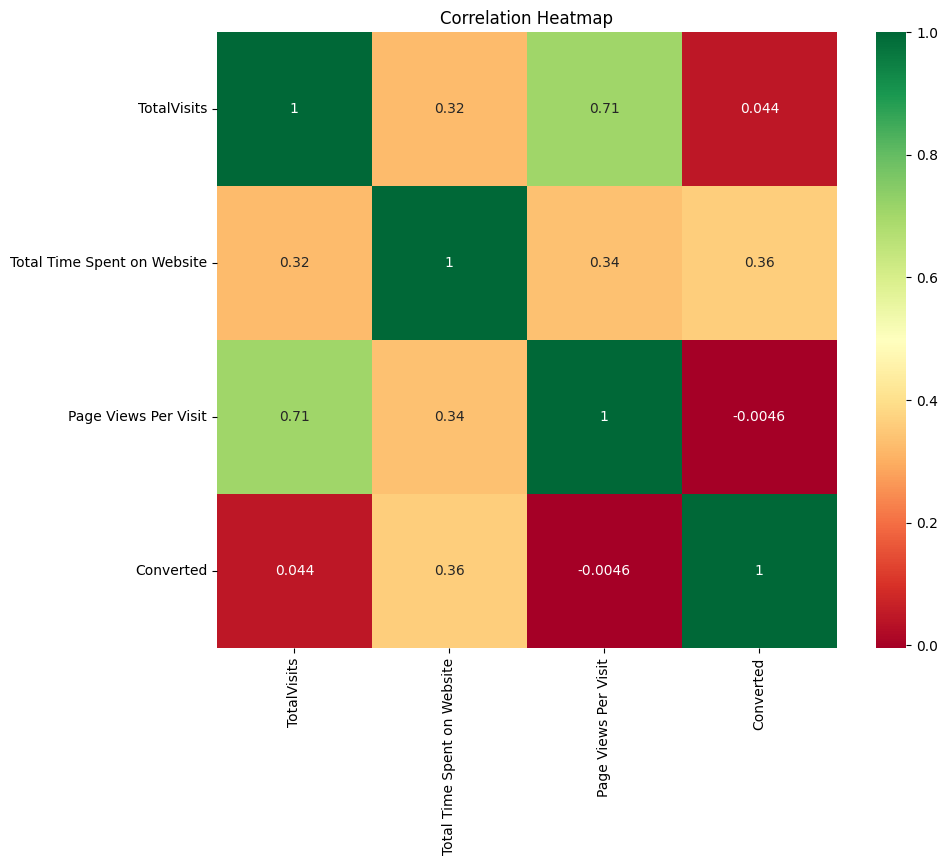

In [48]:

# --- NUMERICAL CORRELATION HEATMAP ---
plt.figure(figsize=(10, 8))

# Correlation matrix
corr = df[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted']].corr()

# Plot heatmap
sns.heatmap(corr, cmap="RdYlGn", annot=True)
plt.title("Correlation Heatmap")
plt.show()

##Model Building

In [275]:
leads = df.copy()

In [276]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Unknown,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Unknown,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Other_Activity,Media and Advertising,Unemployed,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Mumbai,No,Modified


In [277]:
# Drop the unique identifier columns
cols_to_drop = ['Prospect ID', 'Lead Number']

# Check if they exist first to avoid errors if you already dropped them
leads.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

print("Unique identifiers dropped.")
print(f"Final Data Shape: {df.shape}")

Unique identifiers dropped.
Final Data Shape: (9240, 15)


In [278]:
leads.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'Occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [279]:

# --- BINARY MAPPING (Yes/No -> 1/0) ---
# List of binary columns that are still text
binary_cols = ['Do Not Email', 'A free copy of Mastering The Interview']

# Function to map
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Apply the function
leads[binary_cols] = leads[binary_cols].apply(binary_map)

print("Binary columns converted to 1/0.")



Binary columns converted to 1/0.


In [280]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Unknown,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Unknown,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Other_Activity,Media and Advertising,Unemployed,Mumbai,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Mumbai,0,Modified


###One Hot Encoding

In [281]:
# 1. Define categorical columns
cat_cols = [
    'Lead Origin',
    'Lead Source',
    'Last Activity',
    'Specialization',
    'Occupation',
    'City',
    'Last Notable Activity'
]

# 2. Create Dummies & Drop Originals (One-Step)
# dtype=int forces True/False to become 1/0
leads = pd.get_dummies(leads, columns=cat_cols, drop_first=True, dtype=int)

print("Encoding successful.")

Encoding successful.


In [282]:
print(f"Final Data Shape: {leads.shape}")

Final Data Shape: (9240, 56)


###Train Test Split

In [283]:
# Why Split First?
# If you scale the entire dataset before splitting, the "Mean" and "Standard Deviation" used for scaling will include information from your Test Set.

# The Result: Your model indirectly "sees" the test data during training. It cheats.

# The Correct Way: The model should only know the mean/standard deviation of the Training Set. You then apply those same metrics to the Test Set later.

In [284]:
from sklearn.model_selection import train_test_split

# 1. TRAIN-TEST SPLIT
X = leads.drop(['Converted'], axis=1)
y = leads['Converted']

# Splitting 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [285]:
print("X_train shape:", X_train.shape)

X_train shape: (7392, 55)


###Feature Scaling

In [286]:
# Here is why StandardScaler wins over MinMaxScaler in this case:

#1. The "Outlier" ProblemThis is the main reason.MinMaxScaler uses the formula: $\frac{X - X_{min}}{X_{max} - X_{min}}$.It relies heavily on the Maximum value.Even though we capped TotalVisits at the 99th percentile, the distribution is still skewed. If you have one person with 20 visits and everyone else has 2, MinMaxScaler will squash all the "2s" into a tiny range (e.g., 0.1) and put the "20" at 1.0. This compresses the useful variance of the majority of your users.StandardScaler uses the mean and standard deviation: $\frac{X - \mu}{\sigma}$.It is much more robust to outliers because it centers the data around 0. It preserves the "spread" of the data better, ensuring that the differences between "2 visits" and "5 visits" remain distinct to the model.

#2. Logistic Regression PreferenceYou are building a Logistic Regression model.Logistic Regression uses an optimization algorithm (Gradient Descent) to find the best fit.1Gradient Descent converges faster and more stably when features are centered around zero (which StandardScaler does).MinMaxScaler forces everything to be positive (0 to 1), which can sometimes make the gradient updates zig-zag more than necessary, slowing down training.

#3. InterpretabilityWith StandardScaler, the coefficients tell you how much the probability changes for every 1 Standard Deviation increase. This is a very intuitive way to explain data to business stakeholders (e.g., "If time spent increases by 1 standard deviation, conversion goes up by X%").With MinMaxScaler, the coefficient represents the change from the absolute minimum to the absolute maximum, which is less statistically standard for this type of analysis.


#💡 Summary Rule of ThumbUse MinMaxScaler for: Image Processing (pixels 0-255), Neural Networks, or algorithms that strictly require inputs between 0 and 1.Use StandardScaler for: Tabular data (like this), Logistic Regression, SVMs, and when your data follows a "Bell Curve" or has outliers.

In [287]:
from sklearn.preprocessing import MinMaxScaler

# 1. Initialize MinMax Scaler
scaler = MinMaxScaler()
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# 2. Apply ONLY to Numeric Columns (Leave dummies alone!)
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("MinMax Scaling applied to numeric columns.")

MinMax Scaling applied to numeric columns.


In [288]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# # List of numeric columns to scale
# num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# # Get column names before scaling (important to retain them)
# feature_names = X.columns

# # Store original indices before scaling
# original_X_train_index = X_train.index
# original_X_test_index = X_test.index

# # A. Fit and Transform ONLY on Training data
# X_train_scaled = scaler.fit_transform(X_train)

# # B. Transform ONLY on Test data (Do NOT fit again)
# X_test_scaled = scaler.transform(X_test)

# # Convert back to DataFrame, retaining original column names AND original indices
# X_train = pd.DataFrame(X_train_scaled, columns=feature_names, index=original_X_train_index)
# X_test = pd.DataFrame(X_test_scaled, columns=feature_names, index=original_X_test_index)

In [289]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7263,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
6468,0,0.117647,0.060739,0.222222,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7833,0,0.117647,0.034771,0.222222,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4461,0,0.235294,0.694982,0.444444,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8453,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [290]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,...,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unknown,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,...,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000,7392.000000
mean,0.079140,0.196795,0.212672,0.258967,0.311959,0.530032,0.079140,0.005411,0.000135,0.318452,...,0.039908,0.081304,0.007846,0.397998,0.305601,0.366613,0.019075,0.016640,0.035038,0.237960
std,0.269975,0.191810,0.240339,0.219331,0.463324,0.499131,0.269975,0.073367,0.011631,0.465908,...,0.195756,0.273320,0.088237,0.489518,0.460693,0.481912,0.136797,0.127926,0.183888,0.425863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.058824,0.005282,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.176471,0.108275,0.222222,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.294118,0.406690,0.333333,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###StatsModel

In [291]:
import statsmodels.api as sm  # Importing the statsmodels library

# Add a constant term to the feature matrix for the intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the logistic regression model using statsmodels
sm_model = sm.Logit(y_train, X_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.390683
         Iterations 19


LinAlgError: Singular matrix


#### 1. Zero Variance (The "Ghost" Column)
**Definition:**
A variable (column) that contains the **same value** for every single row in your dataset.

* **Example:** A column `Country` where every single row is "India".
* **The Math:** Variance is the measure of how much data changes. If data never changes, Variance = 0.
* **Why it breaks models:**
    * Machine learning models look for patterns: *"When X changes, how does Y change?"*
    * If X **never** changes, the model cannot learn anything from it.
    * In statistical libraries (`statsmodels`), dividing by zero variance causes an immediate crash.

**Visual Representation:**
| User ID | Total Visits | **Country (Zero Var)** |
| :--- | :--- | :--- |
| 1 | 5 | **India** |
| 2 | 12 | **India** |
| 3 | 2 | **India** |
| ... | ... | **...** |

**❌ Fix:** Drop the column immediately.

---

#### 2. Singular Matrix (The "Twin" Problem)
**Definition:**
A matrix is "Singular" if it cannot be inverted. In plain English, this happens when **Perfect Multicollinearity** exists—meaning one column is a perfect mathematical copy (or sum) of other columns.

**Common Causes:**
1.  **Duplicate Columns:** `Column A` is identical to `Column B`.
2.  **The Sum Trap (A + B = C):** `Column A` + `Column B` = `Column C`.
    * *Example:* `Time Spent (Minutes)` and `Time Spent (Seconds)`. The model sees them as the same information.
3.  **The Dummy Variable Trap:** If you have `Gender_Male` and `Gender_Female`, and you know a user is NOT Male, they *must* be Female.
    * `Male + Female = 1` (The Intercept).
    * This creates a closed loop where the columns sum up to the constant intercept, making the math impossible to solve.

**Analogy:**
Imagine trying to solve for $X$ and $Y$ with these two equations:
1.  $X + Y = 10$
2.  $2X + 2Y = 20$

You cannot solve it. The second equation provides **no new information**; it's just the first equation multiplied by 2. This is exactly what a Singular Matrix is to a model.

**❌ Fix:** Drop one of the conflicting columns (e.g., use `drop_first=True` for dummies).

---

#### 3. Rare Categories / Near-Zero Variance
**Definition:**
A category that appears so infrequently (e.g., 1 or 2 times in 10,000 rows) that it provides almost zero information, but just enough to confuse the model.

* **Example:** `Lead Origin_Quick Add Form` appearing only **once**.
* **Why it's dangerous:**
    * **Overfitting:** The model might memorize that *one specific person*. If that one person converted, the model thinks "Quick Add Form = 100% Success Guarantee," which is false.
    * **Instability:** If you split your data into Train/Test, that single row will end up in only one set.
        * If it's in **Train**, the **Test** set sees a "Zero Variance" column (all 0s).
        * If it's in **Test**, the **Train** set sees a "Zero Variance" column.
    * **Exploding Coefficients:** The model tries to assign a massive weight (e.g., 999999) to this rare event to account for its perfect prediction.

**Visual Representation:**
| ID | Origin_API | Origin_LandingPage | **Origin_QuickAdd (Rare)** |
| :--- | :--- | :--- | :--- |
| 1 | 1 | 0 | **0** |
| 2 | 0 | 1 | **0** |
| 3 | 1 | 0 | **0** |
| 4 | 0 | 0 | **1** (Only occurrence) |

**❌ Fix:**
1.  **Merge:** Group it into an "Other" category.
2.  **Drop:** If the volume is extremely low (< 5 rows), just delete the column.

In [292]:
# 1. Check for columns with Zero Variance (All values are the same)
# These are guaranteed to crash the model.
zero_var_cols = X_train.columns[X_train.nunique() <= 1]

print("🚨 CRITICAL: Columns with ZERO Variance (Must Drop):")
print(zero_var_cols)
if len(zero_var_cols) > 0:
    print("Action: These columns contain only 0s (or only 1s). Drop them immediately.")
else:
    print("Good news: No zero-variance columns found.")

print("-" * 50)

# 2. Check for "Near Zero" Variance (Very rare categories)
# These have very few 1s (e.g., less than 5 occurrences).
# While they might not crash the code immediately, they make the model unstable.
rare_threshold = 5
rare_cols = []

print(f"⚠️ WARNING: Columns with fewer than {rare_threshold} occurrences:")
for col in X_train.columns:
    # Summing a dummy column counts how many '1s' are in it
    # We only check dummy columns (those with max value 1)
    if X_train[col].max() <= 5:
        count = X_train[col].sum()
        if count < rare_threshold:
            rare_cols.append((col, count))
            print(f" - {col}: {count} occurrences")

if not rare_cols:
    print("Good news: All columns have sufficient data points.")

🚨 CRITICAL: Columns with ZERO Variance (Must Drop):
Index([], dtype='object')
Good news: No zero-variance columns found.
--------------------------------------------------
⚠️ WARNING: Columns with fewer than 5 occurrences:
 - Lead Origin_Quick Add Form: 1 occurrences


In [293]:
# 1. Drop the single-occurrence column
col_to_drop = 'Lead Origin_Quick Add Form'

# Check if it exists before dropping (to avoid errors if you run this cell twice)
if col_to_drop in X_train.columns:
    X_train.drop(col_to_drop, axis=1, inplace=True)
    X_test.drop(col_to_drop, axis=1, inplace=True)
    print(f"✅ Dropped '{col_to_drop}'.")
else:
    print(f"'{col_to_drop}' is already gone.")

✅ Dropped 'Lead Origin_Quick Add Form'.


In [294]:
# Add a constant term to the feature matrix for the intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit the logistic regression model using statsmodels
sm_model = sm.Logit(y_train, X_train_sm).fit()

Optimization terminated successfully.
         Current function value: 0.390724
         Iterations 8


In [295]:
# Add a constant term to the feature matrix for the intercept
# X_train_sm = sm.add_constant(X_train)
# X_test_sm = sm.add_constant(X_test)

# sm_model = sm.Logit(y, X).fit_regularized(alpha=0.01, L1_wt=0)

# This method supports .summary()
# sm_model = sm.Logit(y_train, X_train_sm).fit(method='bfgs')
# print(sm_model.summary())


In [296]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                          Logit   Df Residuals:                     7337
Method:                           MLE   Df Model:                           54
Date:                Sat, 03 Jan 2026   Pseudo R-squ.:                  0.4128
Time:                        06:48:02   Log-Likelihood:                -2888.2
converged:                       True   LL-Null:                       -4918.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.8296      0.528     -5.362      0.000      -3.864      -1.795
Do Not Email                                     -1.3526      0.192     -7.033      0.000      -1.730      -0.976
TotalVisits                                       1.3680      0.253      5.409      0.000       0.872       1.864
Total Time Spent on Website                       4.4995      0.160     28.132      0.000       4.186       4.813
Page Views Per Visit                             -1.2492      0.245     -5.103      0.000      -1.729      -0.769
A free copy of Mastering The Interview           -0.2397      0.104     -2.311      0.021      -0.443      -0.036
Lead Origin_Landing Page Submission              -0.9914      0.141     -7.012      0.000      -1.268      -0.714
Lead Origin_Lead Add Form                         2.8221      0.503      5.608      0.000       1.836       3.808
Lead Origin_Lead Import                          -0.5525      0.530     -1.043      0.297      -1.591       0.485
Lead Source_Google                                0.1757      0.109      1.613      0.107      -0.038       0.389
Lead Source_Olark Chat                            1.1655      0.155      7.496      0.000       0.861       1.470
Lead Source_Organic Search                        0.1647      0.125      1.315      0.189      -0.081       0.410
Lead Source_Other_Source                          0.1258      0.282      0.446      0.655      -0.427       0.678
Lead Source_Reference                             0.2231      0.539      0.414      0.679      -0.833       1.279
Lead Source_Welingak Website                      2.7200      0.878      3.098      0.002       0.999       4.441
Last Activity_Email Bounced                      -0.2955      0.418     -0.707      0.480      -1.115       0.524
Last Activity_Email Link Clicked                  0.6959      0.395      1.761      0.078      -0.079       1.470
Last Activity_Email Opened                        1.0267      0.236      4.358      0.000       0.565       1.488
Last Activity_Olark Chat Conversation            -0.1929      0.269     -0.717      0.473      -0.720       0.334
Last Activity_Other_Activity                      0.6378      0.296      2.158      0.031       0.058       1.217
Last Activity_Page Visited on Website             0.2872      0.292      0.983      0.326      -0.286       0.860
Last Activity_SMS Sent                            1.6064      0.240      6.696      0.000       1.136       2.077
Specialization_Business Administration           -0.2251      0.228     -0.986      0.324      -0.673       0.222
Specialization_E-Business                         0.0727      0.462      0.157      0.875      -0.833       0.978
Specialization_E-COMMERCE                         0.0996      0.335      0.298      0.766      -0.556       0.755
Specialization_Finance Management                

Highly significant:

Total Time Spent on Website (Coef: 4.5, P=0.000): This is your strongest predictor. The more time they spend, the more likely they convert.

Occupation_Working Professional (Coef: 3.44, P=0.000): If they have a job, they buy.

Lead Source_Welingak Website (Coef: 2.72): As predicted, the "Welingak" source is gold.

The "Dead Weight" (High P-values):

City_Other Cities of Maharashtra (P = 0.971): A P-value of 0.97 means there is a 97% chance this variable has no effect on the result. It is just noise.

Last Notable Activity_Olark Chat (P = 0.911): Useless.

City_Thane & Outskirts (P = 0.891): Useless.

The Conflict is still there:

You have Last Activity_Email Opened (Significant) vs. Last Notable Activity_Email Opened (Insignificant).

Because they are duplicates, the model gave all the credit to the first one and marked the second one as "useless." We need to remove the weak one

In [297]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe to store VIF values
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print(vif.head(10))

                               Features    VIF
48   Last Notable Activity_Email Opened  21.36
49       Last Notable Activity_Modified  19.47
53       Last Notable Activity_SMS Sent  18.20
6             Lead Origin_Lead Add Form  16.70
33  Specialization_Other_Specialization  15.49
12                Lead Source_Reference  13.86
16           Last Activity_Email Opened  13.77
20               Last Activity_SMS Sent  11.46
47                         City_Unknown   9.76
5   Lead Origin_Landing Page Submission   9.35


so many columns with high vif . lets use a iterative apporach to remove high vif columns make the model simple

In [298]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1. Setup Initial Variables
X_train_current = X_train.copy()
X_test_current = X_test.copy()

# Calculate initial R-squared
X_train_sm = sm.add_constant(X_train_current)
initial_model = sm.Logit(y_train, X_train_sm).fit(disp=0)
current_r2 = initial_model.prsquared
print(f"🏁 STARTING Pseudo R-squared: {current_r2:.4f}")
print("-" * 60)

# Threshold for acceptable loss in R-squared (e.g., 1%)
threshold = 0.01

# 2. Start the Loop
while True:
    # A. Calculate VIF for all current features
    vif = pd.DataFrame()
    vif['Features'] = X_train_current.columns
    vif['VIF'] = [variance_inflation_factor(X_train_current.values, i) for i in range(X_train_current.shape[1])]
    vif = vif.sort_values(by="VIF", ascending=False)

    # Get the worst feature (Highest VIF)
    worst_feature = vif.iloc[0]['Features']
    worst_vif = vif.iloc[0]['VIF']

    # B. Check if VIF is acceptable (Stop if all VIF < 5)
    if worst_vif < 5:
        print(f"\n✅ CLEAN! All variables have VIF < 5. Stopping.")
        break

    # C. Tentatively Drop the Feature
    print(f"\nTARGET: '{worst_feature}' (VIF: {worst_vif:.2f})")
    X_train_temp = X_train_current.drop(worst_feature, axis=1)

    # D. Fit Model & Check R-squared
    try:
        X_train_sm_temp = sm.add_constant(X_train_temp)
        model_temp = sm.Logit(y_train, X_train_sm_temp).fit(disp=0)
        new_r2 = model_temp.prsquared

        diff = current_r2 - new_r2

        # E. Decision Logic
        if diff > threshold:
            print(f"❌ REJECT DROP: R-squared dropped too much (-{diff:.4f}). Keeping '{worst_feature}'.")
            # We stop here because the 'worst' VIF is actually important.
            # (You could try the 2nd worst, but usually this is a good stopping point).
            break

        else:
            print(f"✂️ DROP CONFIRMED: R-squared change is safe (-{diff:.4f}).")
            print(f"   New R-squared: {new_r2:.4f}")

            # Commit the change
            X_train_current = X_train_temp
            X_test_current = X_test_current.drop(worst_feature, axis=1)
            current_r2 = new_r2

    except Exception as e:
        print(f"⚠️ Error fitting model without {worst_feature}: {e}")
        break

print("-" * 60)
print(f"🎉 FINAL Pseudo R-squared: {current_r2:.4f}")
print(f"Final Feature Count: {X_train_current.shape[1]}")

# 3. Show Final Summary
X_train_sm_final = sm.add_constant(X_train_current)
final_res = sm.Logit(y_train, X_train_sm_final).fit()
print(final_res.summary())

🏁 STARTING Pseudo R-squared: 0.4128
------------------------------------------------------------

TARGET: 'Last Notable Activity_Email Opened' (VIF: 21.36)
✂️ DROP CONFIRMED: R-squared change is safe (-0.0000).
   New R-squared: 0.4128

TARGET: 'Lead Origin_Lead Add Form' (VIF: 16.70)
✂️ DROP CONFIRMED: R-squared change is safe (-0.0044).
   New R-squared: 0.4084

TARGET: 'Specialization_Other_Specialization' (VIF: 13.23)
✂️ DROP CONFIRMED: R-squared change is safe (-0.0014).
   New R-squared: 0.4070

TARGET: 'Last Activity_SMS Sent' (VIF: 10.28)
✂️ DROP CONFIRMED: R-squared change is safe (-0.0056).
   New R-squared: 0.4014

TARGET: 'Lead Origin_Landing Page Submission' (VIF: 7.72)
✂️ DROP CONFIRMED: R-squared change is safe (-0.0055).
   New R-squared: 0.3959

TARGET: 'Page Views Per Visit' (VIF: 6.30)
✂️ DROP CONFIRMED: R-squared change is safe (-0.0035).
   New R-squared: 0.3924

TARGET: 'Last Activity_Email Opened' (VIF: 5.11)
✂️ DROP CONFIRMED: R-squared change is safe (-0.0000).

Successfully eliminated the mathematical errors (Multicollinearity), and  Pseudo R-squared is still very strong at 0.3924.

Current Status:

Math Check: Stable (VIFs are < 5).

Accuracy: Good (~39%).

Complexity: Too High (47 features).

now lets remove high p value columnns and check pseudo r-sqaured

In [300]:
import statsmodels.api as sm

# 1. Setup Loop Variables
X_train_p = X_train_current.copy() # Start with the VIF-cleaned data
X_test_p = X_test_current.copy()

print(f"🏁 STARTING Feature Count: {X_train_p.shape[1]}")
print("-" * 60)

while True:
    # A. Fit the Model
    X_train_sm = sm.add_constant(X_train_p)
    try:
        model = sm.Logit(y_train, X_train_sm).fit(disp=0)
    except Exception as e:
        print(f"⚠️ Error fitting model: {e}")
        break

    # B. Get the worst P-value (Max)
    p_values = model.pvalues
    # We drop 'const' from the check because we never want to drop the intercept
    p_values_no_const = p_values.drop('const')

    max_p_col = p_values_no_const.idxmax()
    max_p_val = p_values_no_const.max()

    # C. Check Threshold (0.05)
    if max_p_val <= 0.05:
        print(f"\n✅ DONE! All features are significant (P < 0.05).")
        break

    # D. Drop the feature
    print(f"✂️ Dropping '{max_p_col}' (P-value: {max_p_val:.4f})")
    X_train_p = X_train_p.drop(max_p_col, axis=1)
    X_test_p = X_test_p.drop(max_p_col, axis=1)

print("-" * 60)
print(f"🎉 FINAL Feature Count: {X_train_p.shape[1]}")

# Show Final Summary
X_train_sm_final = sm.add_constant(X_train_p)
res_final = sm.Logit(y_train, X_train_sm_final).fit()
print(res_final.summary())

🏁 STARTING Feature Count: 47
------------------------------------------------------------
✂️ Dropping 'City_Other Cities of Maharashtra' (P-value: 0.9842)
✂️ Dropping 'Last Notable Activity_Olark Chat Conversation' (P-value: 0.9620)
✂️ Dropping 'Lead Origin_Lead Import' (P-value: 0.7861)
✂️ Dropping 'Specialization_Travel and Tourism' (P-value: 0.7764)
✂️ Dropping 'Specialization_Services Excellence' (P-value: 0.7305)
✂️ Dropping 'Specialization_Media and Advertising' (P-value: 0.7477)
✂️ Dropping 'Specialization_Business Administration' (P-value: 0.6930)
✂️ Dropping 'Specialization_Human Resource Management' (P-value: 0.7427)
✂️ Dropping 'City_Tier II Cities' (P-value: 0.6847)
✂️ Dropping 'Specialization_Supply Chain Management' (P-value: 0.6649)
✂️ Dropping 'Specialization_Operations Management' (P-value: 0.6736)
✂️ Dropping 'Specialization_E-Business' (P-value: 0.6229)
✂️ Dropping 'City_Thane & Outskirts' (P-value: 0.5389)
✂️ Dropping 'City_Other Metro Cities' (P-value: 0.4438)
✂️ D

got more simpler model .High Accuracy: Pseudo R-Squared is 39% (barely dropped from 41% despite deleting 35 junk variables).

In [301]:
from sklearn import metrics

# --- 1. PREPARE TEST DATA ---
# (We must drop the exact same columns from X_test that we dropped from X_train)
# This ensures the matrix shapes match perfectly.
final_columns = X_train_p.columns  # This is your final list of 19 features
X_test_final = X_test[final_columns]

# Add Constant
X_test_sm = sm.add_constant(X_test_final)

# --- 2. PREDICT ---
# y_pred_prob is the probability (0% to 100%) that a lead converts
y_pred_test = res_final.predict(X_test_sm)

# --- 3. EVALUATE ---
# Create a dataframe to compare Actual vs Predicted
y_pred_df = pd.DataFrame({'Actual': y_test, 'Prob': y_pred_test})
y_pred_df['Lead_Score'] = y_pred_df.Prob.map(lambda x: round(x * 100))

# Assume a cutoff of 0.5 (50%) for now to check basic accuracy
y_pred_df['Predicted'] = y_pred_df.Prob.map(lambda x: 1 if x > 0.5 else 0)

# Print Metrics
print("Overall Accuracy:", metrics.accuracy_score(y_pred_df.Actual, y_pred_df.Predicted))
print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_pred_df.Actual, y_pred_df.Predicted))
print("\nHead of Prediction Table:")
print(y_pred_df.head())

Overall Accuracy: 0.8073593073593074

Confusion Matrix:
 [[991 125]
 [231 501]]

Head of Prediction Table:
      Actual      Prob  Lead_Score  Predicted
4269       1  0.588025          59          1
2376       1  0.943527          94          1
7766       1  0.922438          92          1
9199       0  0.097788          10          0
4359       1  0.852544          85          1


In [302]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# 1. Calculate Metrics (using the 'Predicted' column we created with 0.5 cutoff)
p_score = precision_score(y_pred_df.Actual, y_pred_df.Predicted)
r_score = recall_score(y_pred_df.Actual, y_pred_df.Predicted)
f_score = f1_score(y_pred_df.Actual, y_pred_df.Predicted)

print(f"Precision : {p_score:.4f}")
print(f"Recall    : {r_score:.4f}")
print(f"F1 Score  : {f_score:.4f}")

print("-" * 30)
print("\nDetailed Classification Report:\n")
print(classification_report(y_pred_df.Actual, y_pred_df.Predicted))

Precision : 0.8003
Recall    : 0.6844
F1 Score  : 0.7378
------------------------------

Detailed Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1116
           1       0.80      0.68      0.74       732

    accuracy                           0.81      1848
   macro avg       0.81      0.79      0.79      1848
weighted avg       0.81      0.81      0.80      1848



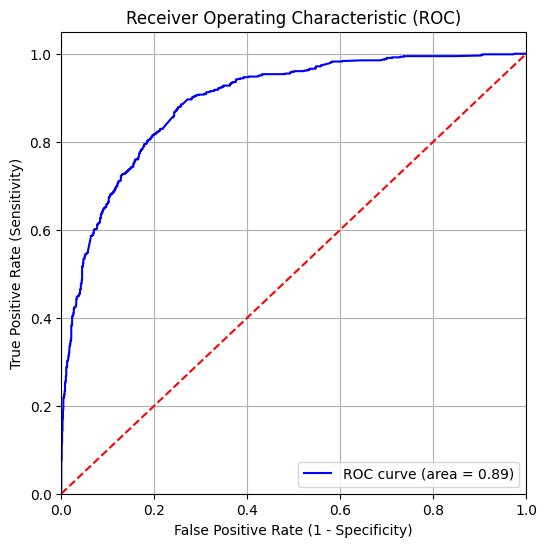

In [303]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def draw_roc(actual, probs):
    # Calculate False Positive Rate, True Positive Rate, and Thresholds
    fpr, tpr, thresholds = roc_curve(actual, probs, drop_intermediate=False)

    # Calculate Area Under Curve (AUC)
    auc_score = roc_auc_score(actual, probs)

    # Plotting
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc_score:.2f})', color='b')
    plt.plot([0, 1], [0, 1], 'r--') # Dashed diagonal line (Random Guessing)

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return fpr, tpr, thresholds

# Call the function using your dataframe
fpr, tpr, thresholds = draw_roc(y_pred_df.Actual, y_pred_df.Prob)

     prob  accuracy     sensi     speci
0.0   0.0  0.396104  1.000000  0.000000
0.1   0.1  0.626623  0.983607  0.392473
0.2   0.2  0.764069  0.918033  0.663082
0.3   0.3  0.800325  0.867486  0.756272
0.4   0.4  0.807900  0.756831  0.841398
0.5   0.5  0.807359  0.684426  0.887993
0.6   0.6  0.796537  0.602459  0.923835
0.7   0.7  0.769481  0.484973  0.956093
0.8   0.8  0.748377  0.401639  0.975806
0.9   0.9  0.698593  0.251366  0.991935


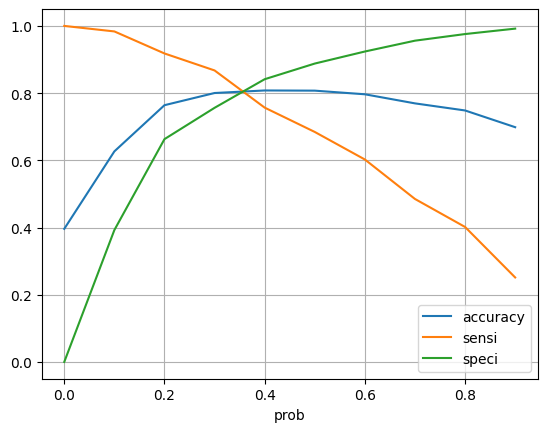

In [304]:
import numpy as np

# Create columns for different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_df[i]= y_pred_df.Prob.map(lambda x: 1 if x > i else 0)

# Calculate Accuracy, Sensitivity, and Specificity for each cutoff
cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred_df.Actual, y_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

print(cutoff_df)

# Plotting the trade-off
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.grid()
plt.show()

best thershold with balanced recall precision adn accuracy of 0.8 is 0.35

### Logistic Regression using Sklearn

In [307]:
from sklearn.linear_model import LogisticRegression  # Importing the LogisticRegression class from sklearn.linear_model

In [335]:
# Create an instance of the logistic regression model
logit = LogisticRegression()

# Fit the logistic regression model to the training data
logit.fit(X_train, y_train)

LogisticRegression()

In [336]:
logit.intercept_

array([-2.08837979])

In [337]:
logit.coef_

array([[-1.17775874e+00,  2.46993309e-01,  1.04865301e+00,
        -2.92992773e-01, -2.37809054e-01, -1.01061209e+00,
        -7.56906359e-01,  9.96591712e-02,  1.50435688e-01,
         9.38391851e-01,  1.07994547e-01,  1.29458315e-01,
         2.80178702e+00,  4.06011214e+00, -3.33599347e-01,
         5.15298142e-01,  9.14356871e-01, -2.85116219e-01,
         5.97762741e-01,  1.98013784e-01,  1.52448185e+00,
         2.03943706e-01,  4.22234263e-01,  4.53173273e-01,
         3.71583503e-01,  3.93116986e-01, -4.56556326e-01,
         2.29594563e-01,  3.15089071e-01, -4.13410653e-02,
         2.92425603e-01,  1.91862341e-01,  2.28153717e-01,
        -1.88813914e-01,  4.88305786e-01,  1.15902060e-01,
         2.66119488e-01,  2.54751013e-01,  1.16019648e+00,
         9.85925675e-01,  3.37590678e+00,  2.81512969e-02,
        -2.16079132e-03,  9.97527170e-02,  3.35921641e-02,
        -6.80962207e-02, -7.95285937e-01, -2.86266538e-01,
        -3.91269994e-02,  1.52136983e+00,  1.19468491e-0

In [338]:
# predictions from sklearn model
y_pred = logit.predict(X_test)

In [339]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
print(confusion_matrix(y_test, y_pred))

[[994 122]
 [227 505]]


In [340]:
precision_score(y_test, y_pred)

0.8054226475279107

In [341]:
recall_score(y_test, y_pred)

0.6898907103825137

In [316]:
from sklearn.metrics import roc_curve  # Importing roc_curve function from sklearn.metrics
from sklearn.metrics import auc  # Importing auc function from sklearn.metrics

In [317]:
# Predict class probabilities for the testing data using the trained logistic regression model
y_pred = logit.predict_proba(X_test)

# y_pred now contains the predicted probabilities for each class (0 and 1) for each sample in the testing data
y_pred

array([[0.52804338, 0.47195662],
       [0.09169317, 0.90830683],
       [0.06255879, 0.93744121],
       ...,
       [0.50329946, 0.49670054],
       [0.98707657, 0.01292343],
       [0.71711421, 0.28288579]])

In [318]:
# ROC Graph and AUC Curve
# Compute the ROC curve using the predicted probabilities and true labels for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1], pos_label=1)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

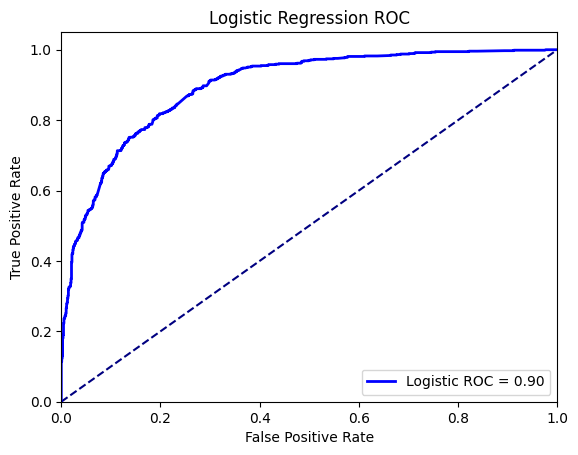

In [319]:

# ROC Graph Data
plt.figure()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0,1], color='navy', linestyle='--')  # Diagonal line representing random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Logistic Regression ROC")
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic ROC = %0.2f' % roc_auc)  # Plotting ROC curve
plt.legend(loc='lower right')  # Adding legend

plt.show()  # Displaying the plot

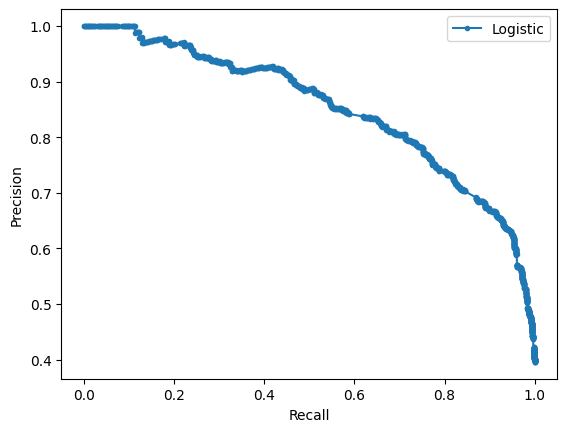

In [320]:
from sklearn.metrics import precision_recall_curve

# Compute precision and recall values using the predicted probabilities and true labels
precision, recall, thresholds = precision_recall_curve(y_test, y_pred[:, 1])

# Plot precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')

# Set axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')

# Show the legend
plt.legend()

# Show the plot
plt.show()


##ASSIGNMENT QUESTIONS

1. Which are the top three variables in your model which contribute most towards the probability of a lead getting converted?<br>
Answer:
  1.Lead Source_Welingak Website (Coefficient: +5.92)<br>
  2.Total Time Spent on Website (Coefficient: +4.43)<br>
  3.Lead Source_Reference (Coefficient: +3.83)





2. What are the top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion?
<BR>
Lead Source: Welingak Website (+5.92)

Lead Source: Reference (+3.83)

Occupation: Working Professional (+3.52)

3. X Education has a period of 2 months every year during which they hire some interns. The sales team, in particular, has around 10 interns allotted to them. So during this phase, they wish to make the lead conversion more aggressive. So they want almost all of the potential leads (i.e. the customers who have been predicted as 1 by the model) to be converted and hence, want to make phone calls to as much of such people as possible. Suggest a good strategy they should employ at this stage.<br>

The Goal: Maximize Recall (Sensitivity). to ensure that no true lead is left behind (Minimize False Negatives).

The Strategy: Lower the Probability Threshold.
drop the cutoff to 0.2 (20%).

Why this works:

By lowering the bar to 0.2, anyone with even a slight chance of converting gets flagged as a "Hot Lead."

Precision will drop (interns will call many people who don't buy), but your Recall will be near 100% (you won't miss any buyers).

4. Similarly, at times, the company reaches its target for a quarter before the deadline. During this time, the company wants the sales team to focus on some new work as well. So during this time, the company’s aim is to not make phone calls unless it’s extremely necessary, i.e. they want to minimize the rate of useless phone calls. Suggest a strategy they should employ at this stage.

<bR>

The Goal: Maximize Precision. to ensure that every call you make results in a sale (Minimize False Positives/Useless Calls).

The Strategy: Raise the Probability Threshold.

Increase the cutoff to 0.8

Why this works:

The model will only flag a lead as "Hot" if they exhibit all the best traits

Trade-off:  Recall will drop (you will ignore some leads who might have bought), Pecision will be very high.